In [141]:
import pandas as pkg_pandas
import numpy as pkg_numpy
from matplotlib import pyplot as pkg_plot
from sklearn import linear_model as pkg_linear_model
from sklearn import model_selection as pkg_model_selection

In [142]:
baseline_df = pkg_pandas.read_csv("../data/cbex-lgr-insurance-buyers-train.csv")
baseline_df.shape

(27, 2)

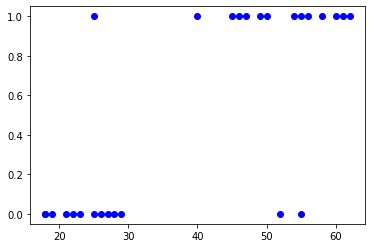

In [143]:
%matplotlib inline
pkg_plot.title(label='Age (x-axis) vs. Insured (y-axis)', fontsize=14)
pkg_plot.xlabel='age'
pkg_plot.ylabel='insured'
pkg_plot.scatter(baseline_df.age, baseline_df.insured, color='blue', marker='o')

In [144]:
baseline_inputs = baseline_df[['age']]
baseline_inputs

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [145]:
baseline_outputs = baseline_df.insured
baseline_outputs

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: insured, dtype: int64

In [146]:
train_inputs, test_inputs, train_outputs, test_outputs = \
    pkg_model_selection.train_test_split(baseline_inputs, baseline_outputs, test_size=0.20, random_state = 33)

print("=== Baseline Split - Train and Test ===")
print("Lengths: Baseline = {}, Train = {}, Test = {}".format(len(baseline_inputs), len(train_inputs), len(test_inputs)))

=== Baseline Split - Train and Test ===
Lengths: Baseline = 27, Train = 21, Test = 6


In [147]:
model = pkg_linear_model.LogisticRegression()
model.fit(X=train_inputs, y=train_outputs)
model.coef_, model.intercept_, model.classes_

(array([[0.11742821]]), array([-4.78354732]), array([0, 1]))

In [148]:
model_score = model.score(X=test_inputs, y=test_outputs)
model_score

0.8333333333333334

In [149]:
test_inputs.head(5)

,age
21,26
22,40
15,55
5,56
4,46


In [150]:
actual_outputs = pkg_numpy.array(test_outputs)
predicted_outputs = model.predict(test_inputs)

print ("=== Result ===")
print ("Actual    Outputs = {}".format(actual_outputs))
print ("Predicted Outputs = {}".format(predicted_outputs))

=== Result ===
Actual    Outputs = [0 1 1 1 1 0]
Predicted Outputs = [0 0 1 1 1 0]


In [151]:
model.predict_proba(pkg_pandas.DataFrame({
    "age" : [12,22,32,42,52,62,72,82]
}))

array([[0.9668951 , 0.0331049 ],
       [0.9002609 , 0.0997391 ],
       [0.73610952, 0.26389048],
       [0.46295865, 0.53704135],
       [0.21036621, 0.78963379],
       [0.07606866, 0.92393134],
       [0.02481247, 0.97518753],
       [0.00780182, 0.99219818]])

In [152]:
model.predict_log_proba(pkg_pandas.DataFrame({
    "age" : [15,25,35,45,55,65,75,85]
}))

array([[-0.04754907, -3.0696733 ],
       [-0.14632888, -1.99417104],
       [-0.41203686, -1.08559696],
       [-0.97452644, -0.47380448],
       [-1.8466921 , -0.17168808],
       [-2.90555831, -0.05627223],
       [-4.04129904, -0.01773089],
       [-5.20336342, -0.00551321]])

In [153]:
model.predict(pkg_pandas.DataFrame({
    "age" : [17,27,37,47,57,67,77,87]
}))

array([0, 0, 0, 1, 1, 1, 1, 1])

In [154]:
model.predict(pkg_pandas.DataFrame({
    "age" : [19,29,39,49,59,69,79,89]
}))

array([0, 0, 0, 1, 1, 1, 1, 1])

In [155]:
model.predict(pkg_pandas.DataFrame({
    "age" : [20,30,40,50,60,70,80,90]
}))

array([0, 0, 0, 1, 1, 1, 1, 1])